# The Indian 60/40 equity/bond portfolio

In [1]:
library(DBI)
library(plutoDbR)
library(plutoR)
library(tidyverse)
options("scipen"=999)
options(stringsAsFactors = FALSE)
source("/usr/share/pluto/config.R")
source("/usr/share/pluto/goofy/plot.common.R")
source("/usr/share/pluto/goofy/misc.common.R")

library(ggthemes)
library(quantmod)
library(PerformanceAnalytics)

options(repr.plot.width=16, repr.plot.height=8)

indices <- Indices()

In [2]:
# what are the begin and end dates that we have bond info for?

indices$IndiaGsecTimeSeries() %>%
    group_by(NAME) %>%
    summarize(ST = min(TIME_STAMP), ET = max(TIME_STAMP)) %>%
    print()

# Source:   lazy query [?? x 3]
# Database: NORWAY:StockViz:R
  NAME  ST         ET        
  <chr> <chr>      <chr>     
1 0_5   2003-12-31 2019-12-05
2 10_15 2003-12-31 2019-12-05
3 15_20 2003-12-31 2019-12-05
4 20_30 2003-12-31 2019-12-05
5 5_10  2003-12-31 2019-12-05


In [3]:
# what are the begin and end dates that we have equity index info for?

indicesOfInterest <- c('NIFTY 50 TR', 'NIFTY MIDCAP 100 TR', 'NIFTY MIDCAP 150 TR')

indices$NseTimeSeries() %>%
    filter(NAME %in% indicesOfInterest) %>%
    group_by(NAME) %>%
    summarize(ST = min(TIME_STAMP), ET = max(TIME_STAMP)) %>%
    print()

# Source:   lazy query [?? x 3]
# Database: NORWAY:StockViz:R
  NAME                ST         ET        
  <chr>               <chr>      <chr>     
1 NIFTY 50 TR         1999-06-30 2019-12-05
2 NIFTY MIDCAP 100 TR 2003-01-01 2019-12-05
3 NIFTY MIDCAP 150 TR 2005-04-01 2019-12-05


In [4]:
startDate <- as.Date('2004-01-01')
endDate <- as.Date('2019-11-30')

eqIndex1 <- "NIFTY 50 TR" 
eqIndex2 <- "NIFTY MIDCAP 100 TR" # maximum overlap is for MIDCAP 100 TR

bndIndex <- '0_5' #gsec. shortest tenure

eqDt1 <- indices$NseTimeSeries() %>%
    filter(NAME == eqIndex1 & TIME_STAMP >= startDate & TIME_STAMP <= endDate) %>%
    select(TIME_STAMP, CLOSE) %>%
    collect() %>%
    mutate(TIME_STAMP = as.Date(TIME_STAMP))

eqDt2 <- indices$NseTimeSeries() %>%
    filter(NAME == eqIndex2 & TIME_STAMP >= startDate & TIME_STAMP <= endDate) %>%
    select(TIME_STAMP, CLOSE) %>%
    collect() %>%
    mutate(TIME_STAMP = as.Date(TIME_STAMP))

bndDt <- indices$IndiaGsecTimeSeries() %>%
    filter(NAME == bndIndex & TIME_STAMP >= startDate & TIME_STAMP <= endDate) %>%
    select(TIME_STAMP, TRI) %>%
    collect() %>%
    mutate(TIME_STAMP = as.Date(TIME_STAMP))

eqXts1 <- Common.NormalizeMonthlyDates(monthlyReturn(xts(eqDt1$CLOSE, eqDt1$TIME_STAMP)))
eqXts2 <- Common.NormalizeMonthlyDates(monthlyReturn(xts(eqDt2$CLOSE, eqDt2$TIME_STAMP)))
bndXts <- Common.NormalizeMonthlyDates(monthlyReturn(xts(bndDt$TRI, bndDt$TIME_STAMP)))

port1 <- eqXts1*0.6 + bndXts*0.4
port2 <- eqXts2*0.6 + bndXts*0.4

eqAnnXts1 <- Common.NormalizeMonthlyDates(yearlyReturn(xts(eqDt1$CLOSE, eqDt1$TIME_STAMP)))
eqAnnXts2 <- Common.NormalizeMonthlyDates(yearlyReturn(xts(eqDt2$CLOSE, eqDt2$TIME_STAMP)))
bndAnnXts <- Common.NormalizeMonthlyDates(yearlyReturn(xts(bndDt$TRI, bndDt$TIME_STAMP)))

portAnn1 <- eqAnnXts1*0.6 + bndAnnXts*0.4
portAnn2 <- eqAnnXts2*0.6 + bndAnnXts*0.4

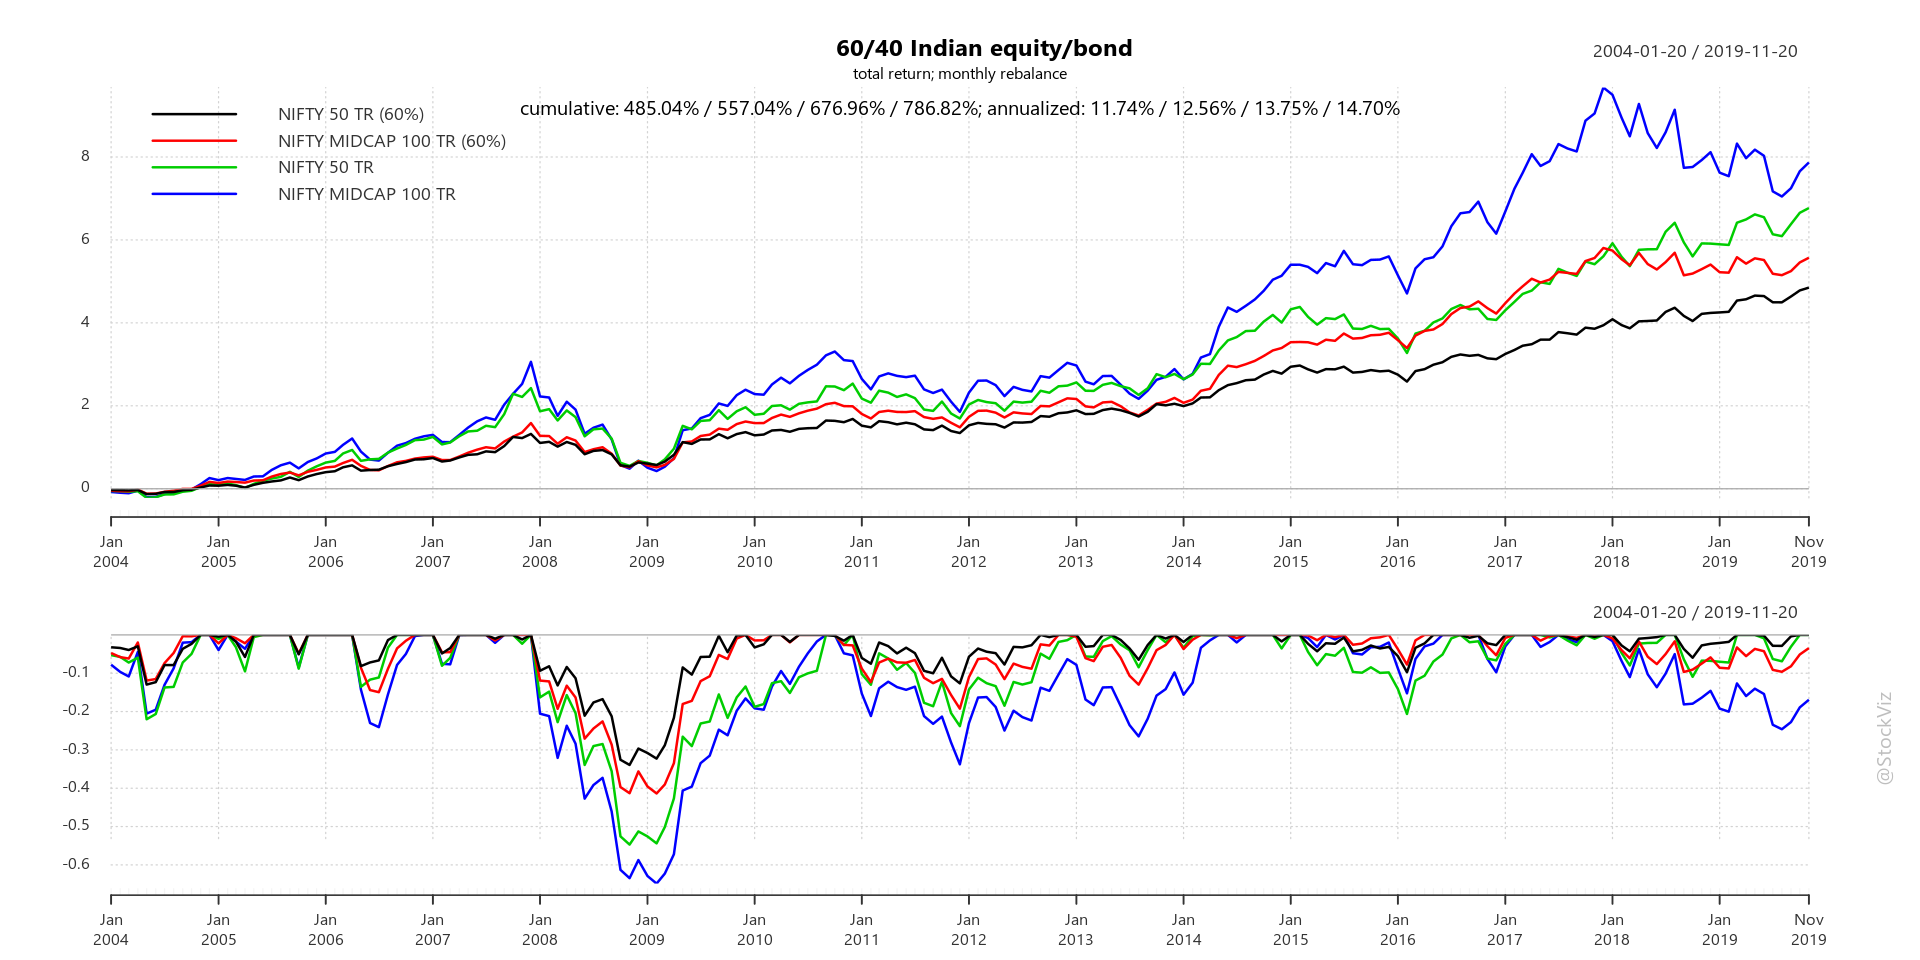

In [5]:
#plot the different scenarios
port2plot <- merge(port1, port2, eqXts1, eqXts2)
names(port2plot) <- c(sprintf("%s (60%%)", eqIndex1), sprintf("%s (60%%)", eqIndex2), eqIndex1, eqIndex2)
Common.PlotCumReturns(port2plot, "60/40 Indian equity/bond", "total return; monthly rebalance")

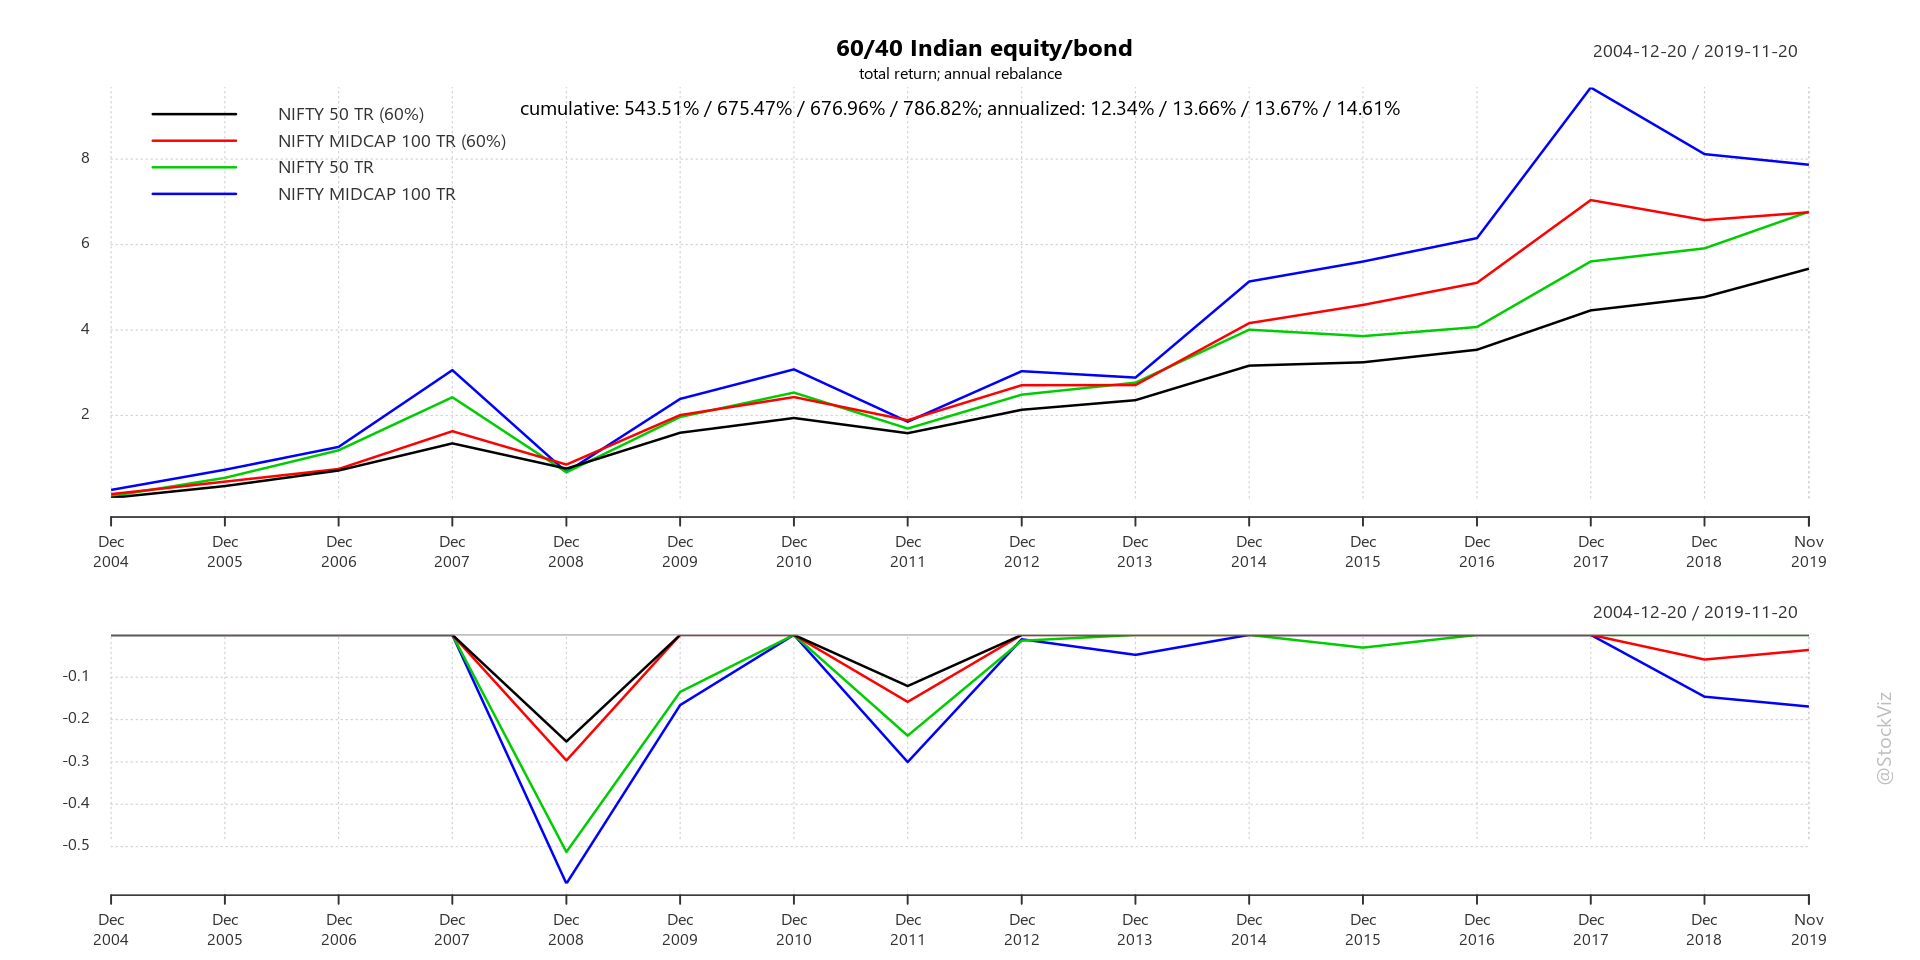

In [6]:
#plot the different scenarios
port2plot <- merge(portAnn1, portAnn2, eqAnnXts1, eqAnnXts2)
names(port2plot) <- c(sprintf("%s (60%%)", eqIndex1), sprintf("%s (60%%)", eqIndex2), eqIndex1, eqIndex2)
Common.PlotCumReturns(port2plot, "60/40 Indian equity/bond", "total return; annual rebalance")

This notebook was created using [pluto](http://pluto.studio). Learn more [here](https://github.com/shyams80/pluto)